[e]:https://finance.yahoo.com/quote/FCEL 

## Learning: Stock Prediction Using Python and Machine Learning

This program utilizes artificial recurrent neural networks known as Long Short Term Memory (LSTM) to predict the closing stock price of [FuelCell Energy Inc.][e] stock using the past 60 day stock prices.


In [117]:
#Import necessary modules and libraries

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')


In [52]:
df = web.DataReader('FCEL', data_source='yahoo', start='2017-01-01', end='2021-02-25')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,22.200001,21.000000,21.600000,21.600000,29442.0,21.600000
2017-01-04,22.799999,21.600000,22.200001,22.799999,46075.0,22.799999
2017-01-05,24.000000,22.799999,22.799999,23.400000,52908.0,23.400000
2017-01-06,24.600000,23.400000,24.000000,24.000000,40258.0,24.000000
2017-01-09,24.600000,22.799999,24.000000,23.400000,33758.0,23.400000
...,...,...,...,...,...,...
2021-02-18,21.340000,18.440001,20.100000,18.459999,47493100.0,18.459999
2021-02-19,21.690001,19.540001,19.950001,20.219999,38892200.0,20.219999
2021-02-22,20.170000,17.690001,19.680000,17.870001,27706800.0,17.870001


In [53]:
#get number of rows and col
df.shape

(1043, 6)

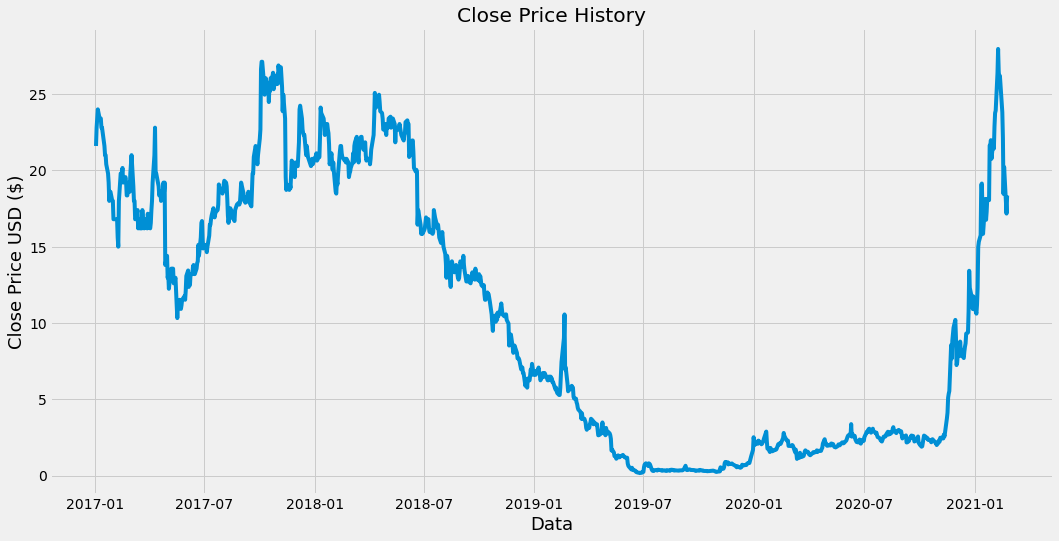

In [54]:
#visualise the close price
plt.figure(figsize = (16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()

In [72]:
#Create dataframe with close column only
data = df.filter(['Close'])

#convert dataframe to numpy array
dataset = data.values #.values is used to represent a dataframe into an array

#get number of rows to train model
trainingDataLength = math.ceil(len(dataset) * .8) #get length of 80% of data

trainingDataLength

835

In [118]:
#feature scale data to smoothen dataset before training neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(dataset) #computes min and max for scaling and transforms data (0 and 1 inclusive)

scaledData

array([[0.77122306],
       [0.81438849],
       [0.83597124],
       ...,
       [0.63705041],
       [0.61187053],
       [0.65431658]])

In [120]:
#create training dataset
#create scaled training dataset
trainData = scaledData[0:trainingDataLength , :]
#Split data into x and y training datasets 
x_train = []
y_train = []

for i in range(60, len(trainData)):
    x_train.append(trainData[i-60:i, 0])
    y_train.append(trainData[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.77122306, 0.81438849, 0.83597124, 0.85755399, 0.83597124,
       0.83597124, 0.83597124, 0.81438849, 0.81438849, 0.77122306,
       0.74964031, 0.74964031, 0.72805756, 0.70647482, 0.68489214,
       0.64172664, 0.66330939, 0.66330939, 0.64172664, 0.64172664,
       0.59856114, 0.59856114, 0.59856114, 0.59856114, 0.59856114,
       0.55539572, 0.53381297, 0.64172664, 0.70647482, 0.70647482,
       0.70647482, 0.71942448, 0.68489214, 0.69784173, 0.68489214,
       0.6546763 , 0.6546763 , 0.68489214, 0.66330939, 0.70647482,
       0.72805756, 0.74964031, 0.67625898, 0.64172664, 0.64172664,
       0.59856114, 0.59856114, 0.62014389, 0.57697846, 0.59856114,
       0.58992806, 0.57697846, 0.57697846, 0.62014389, 0.59856114,
       0.58992806, 0.57697846, 0.59856114, 0.59856114, 0.57697846])]
[0.6115108060667741]



In [121]:
#Convert x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape, must be in 3D only x train is in 2D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #first and second column of x train datasets (no. of rows, time steps, no. of features i.e. closing price)
x_train.shape

(775, 60, 1)

In [124]:
#Create the neural network 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False)) #no more LSTM layers hence false
model.add(Dense(25)) #density of network layout 
model.add(Dense(1))

In [125]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error') #optimizer is used to improve on loss function, loss function determines how well model performed 


In [126]:
#Train model
#fit() also means 'train'
model.fit(x_train, y_train, batch_size = 1, epochs = 1) #epoch is no. of iterations when dataset passed forward and backwards in neural network


775/775 [==============================] - 11s 15ms/step - loss: 0.0057


In [128]:
#Create testing dataset
#Create new array using scaled values 
testData = scaledData[trainingDataLength - 60:, :]

#create datasets x_test and y_test
x_test = []
y_test = dataset[trainingDataLength:, :] #all values we want to predict

for i in range(60, len(testData)):
    x_test.append(testData[i-60:i, 0]) #past 60 day values
    

In [129]:
#convert data to a numpy array
x_test = np.array(x_test)

In [130]:
#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(208, 60, 1)

In [131]:
#Get models predicted closing price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #unscale values to get price not scaled data


In [132]:
#Get root mean squared error, measures how accurate predictions of response, sd of residuals, lower values of RMSE is a better fit
rootMean = np.sqrt(np.mean(predictions - y_test)**2)
rootMean

0.12806824308175307

<ipython-input-133-51c9e8aca3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


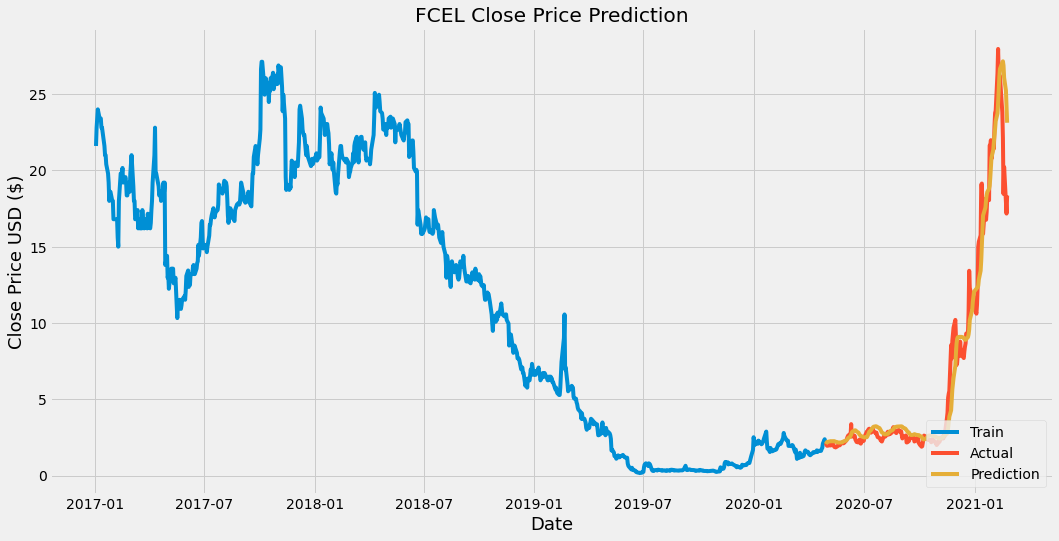

In [133]:
#Plot data
train = data[:trainingDataLength]
valid = data[trainingDataLength:]
valid['Predictions'] = predictions

#Visualize data
plt.figure(figsize=(16, 8))
plt.title('FCEL Close Price Prediction')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Prediction'], loc = 'lower right')
plt.show() 

In [134]:
#Show actual (valid) prices
valid

,Close,Predictions
Date,,
2020-04-29,2.130000,2.065884
2020-04-30,2.020000,2.143946
2020-05-01,1.950000,2.198329
2020-05-04,1.970000,2.227824
2020-05-05,2.010000,2.241744
...,...,...
2021-02-18,18.459999,26.873859
2021-02-19,20.219999,26.071783
2021-02-22,17.870001,25.236067


In [137]:
#Get quotes
fcelQuote = web.DataReader('FCEL', data_source='yahoo', start='2017-01-01', end = '2021-02-24')

newDf = fcelQuote.filter(['Close'])

#get last 60 days closing price and convert dataframe to an array
last60 = newDf[-60:].values

#scale data
last60Scaled = scaler.transform(last60)

X_test = []

#Append past 60 days
X_test.append(last60Scaled)

#Convert X_test to numpy array

X_test = np.array(X_test)

#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get prediction
predictedPrice = model.predict(X_test)

#Undo and revert back to price
predictedPrice = scaler.inverse_transform(predictedPrice)
print(predictedPrice)

[[22.205307]]


In [136]:
#Print actual price of fcel at the particular day
fcelQuote2 = web.DataReader('FCEL', data_source='yahoo', start='2021-02-24', end = '2021-02-24')
print(fcelQuote2['Close'])

Date
2021-02-23    17.17
2021-02-24    18.35
Name: Close, dtype: float64
